# 元ネタ

- Qiita: https://qiita.com/skotaro/items/cdb0732ad1ad2a4b6236
- Note:https://note.mu/goando/n/neb6ea35f1da3

In [1]:
# いつもの呪文
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
# sns.set()
font = {"family": "TakaoGothic"}
matplotlib.rc('font', **font)

# データ可視化のポイント

1. 伝えたいメッセージを明確にする
1. データの大きさを表すには比較する
1. どういう形が一番メッセージを表現できるか考える

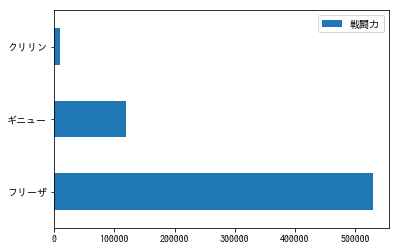

In [2]:
power = pd.DataFrame([530000, 120000, 10000],
                     index=["フリーザ", "ギニュー", "クリリン"],
                     columns=["戦闘力"])
power.plot.barh()

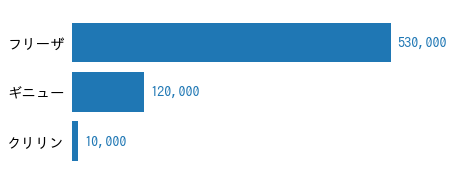

In [3]:
# 1. 凡例を消す legend=False
# 2. バーの間を詰める width=0.8
fig, ax = plt.subplots(figsize=(6, 3))
power.plot.barh(legend=False, ax=ax, width=0.8)

# 3. y軸の順番を逆に
ax.invert_yaxis()

# 4. 四方の枠(spines)を消す
[spine.set_visible(False) for spine in ax.spines.values()]

# 5. y軸x軸のtickを消す
# 6. x軸のtick label(10000など)を消す
ax.tick_params(bottom=False, left=False, labelbottom=False)

# 7. y軸のラベルサイズを大きく
ax.tick_params(axis='y', labelsize='x-large')

# 8. バーの右側に実際の値を表示
vmax = power['戦闘力'].max()
for i, value in enumerate(power['戦闘力']):
    ax.text(value+vmax*0.02, i, f'{value:,}', fontsize='x-large', va='center', color='C0')

# 凡例は使わない

In [4]:
carsales = pd.DataFrame([[970, 1010, 1015, 1008],
                         [975, 1020, 1002, 1035],
                         [975, 985, 995, 999]],
                        index=['Toyota', 'VW', 'GM'], columns=[2013, 2014, 2015, 2016])
carsales

,2013,2014,2015,2016
Toyota,970,1010,1015,1008
VW,975,1020,1002,1035
GM,975,985,995,999


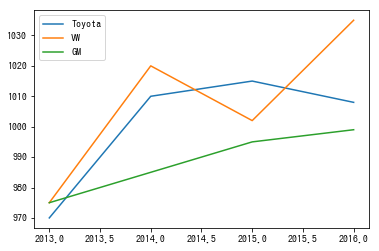

In [5]:
carsales.T.plot()

1. 色を原色のRGBとは違ういい感じの赤青緑に
1.    凡例を消す
1.    線幅を太くする
1.    y軸ラベルを表示
1.    x軸y軸の表示範囲を変更
1.    y軸ラベルの色を変更
1.    x軸y軸のtick位置を変更
1.    x軸y軸のtickを消す
1.    x軸y軸のtick labelの色を変更
1.    y軸のグリッドを表示
1.    左右と上の枠を消す
1.    下の枠の色を変更
1.    通常の凡例の代わりにプロットの右側にindexを表示


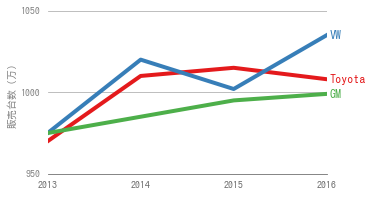

In [6]:
# tickの位置、tick labelのフォーマットの設定はtickerを使う
# https://matplotlib.org/api/ticker_api.html 参照
from matplotlib.ticker import MultipleLocator

# 1. 色を原色のRGBとは違ういい感じの赤青緑に
# Set1 https://matplotlib.org/examples/color/colormaps_reference.html
# https://stackoverflow.com/questions/46148193/how-to-set-default-matplotlib-axis-colour-cycle
from cycler import cycler
c = plt.get_cmap('Set1').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=c)

fig, ax = plt.subplots(figsize=(5, 3))
# 2. 凡例を消す
# 3. 線幅を太くする
carsales.T.plot(ax=ax, linewidth=4, legend=False)

# 4. y軸ラベルを表示
# 5. x軸y軸の表示範囲を変更
year = carsales.columns.values
ax.set(ylabel='販売台数（万）', ylim=(950, 1050), xlim=(year.min(), year.max()))

# 6. y軸ラベルの色を変更
ax.yaxis.label.set_color('gray')

# 7. x軸y軸のtick位置を変更
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_locator(MultipleLocator(1))

# 8. x軸y軸のtickを消す
ax.tick_params(bottom=False, left=False)

# 9. x軸y軸のtick labelの色を変更
ax.tick_params(axis='y', colors='gray') # colorではなくcolors
ax.tick_params(axis='x', colors='dimgray') # colorではなくcolors

# 10. y軸のグリッドを表示
ax.grid(axis='y')

# 11. 左右と上の枠を消す
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# 12. 下の枠の色を変更
ax.spines['bottom'].set_color('dimgray')

# 13. 通常の凡例の代わりにプロットの右側にindexを表示
for i, name in enumerate(carsales.index.values):
    ax.text(year.max()+0.03, ax.lines[i].get_data()[1][-1], name,
            color=f'C{i}', fontsize='large', va='center')

## 一本だけ目立たせる

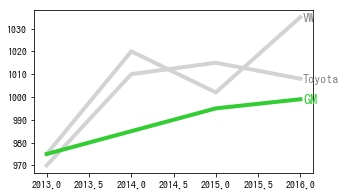

In [7]:
fig, ax = plt.subplots(figsize=(5, 3))

# 1. ひとまず全部灰色でプロット
carsales.T.plot(ax=ax, linewidth=4, legend=False, color='lightgray')

# 2. 注目したい線だけ色を変更
# 目立たせたいデータのLine2Dオブジェクトをax.linesリストから取得。
# 今回のGMはリストの最後にあるので[-1]
ax.lines[-1].set_color('limegreen')

### 上と同じ部分は省略 ###

# 3. 文字列はforループ内でifを使って色指定
for i, name in enumerate(carsales.index.values):
    if name == 'GM':
        color = 'limegreen'
        size = 'x-large'
    else:
        color = 'gray'
        size = 'large'
    ax.text(year.max()+0.03, ax.lines[i].get_data()[1][-1], name,
            color=color, fontsize=size, va='center')

# 目盛ラベルは傾けない

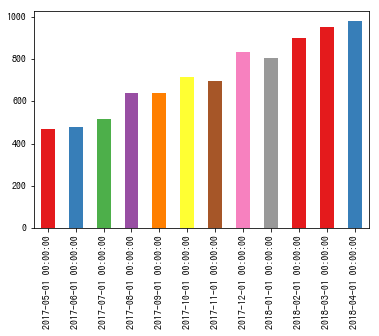

In [8]:
mau = np.linspace(450, 990, 12) + np.random.randint(-50, 50, 12)
timeindex = pd.date_range('2017/5', periods=12, freq='MS')
# `freq='M'`だと月末の日付になってしまうので注意
mau = pd.Series(mau, index=timeindex, name='MAU')
mau.plot.bar()

<BarContainer object of 12 artists>

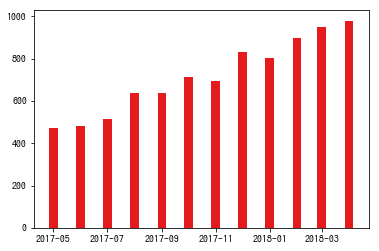

In [9]:
plt.bar(mau.index, mau, width=10) 
# widthに何も指定しないと初期値width=0.8（0.8日分）となりほぼ線になってしまう。

1. バーの色と幅を変更
1. y軸ラベルを表示、色を指定
1. y軸のtick位置の変更
1. x軸y軸のtickを消す
1. x軸y軸のtick labelの色を変更
1. y軸のグリッドを表示
1. 左右と上の枠を消す
1. 下の枠の色を変更
1. x軸のtick labelを月だけにする
1. x軸のtickの位置を毎月ごとにする
1. 各年の最初の月の下に年を表示

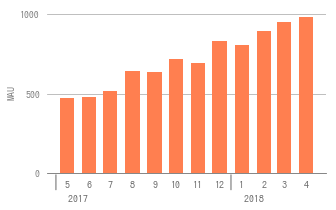

In [10]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(5, 3))

# 1. バーの色と幅を変更
ax.bar(mau.index, mau, width=20, color='coral', zorder=2, align='center')

# 2. y軸ラベルを表示、色を指定
ax.set_ylabel(mau.name, color='gray')

# 3. y軸のtick位置の変更
ax.yaxis.set_major_locator(MultipleLocator(500))

# 4. x軸y軸のtickを消す
ax.tick_params(bottom=False, left=False)

# 5. x軸y軸のtick labelの色を変更
ax.tick_params(axis='x', colors='dimgray')
ax.tick_params(axis='y', colors='gray')

# 6. y軸のグリッドを表示
ax.grid(axis='y')

# 7. 左右と上の枠を消す
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 8. 下の枠の色を変更
ax.spines['bottom'].set_color('dimgray')

# 9. x軸のtick labelを月だけにする
# '%-m'はstrftimeのleading zeroなしmonth表記
ax.xaxis.set_major_formatter(mdates.DateFormatter('%-m')) 


# 10. x軸のtickの位置を毎月ごとにする
ax.xaxis.set_major_locator(mdates.MonthLocator())

# 一度figをdrawしないとmajor tickのpositionが更新されない
fig.canvas.draw()

# 11. 各年の最初の月の下に年を表示
for key, gr in mau.groupby(mau.index.year):
    i = np.where(mau.index == gr.index[0])[0][0]
    pos = ax.get_xmajorticklabels()[i].get_position()
#    ax.text(pos[0]-15, -200, key) # 線なしバージョン
# Axesの外に線を書くのは非常にめんどくさいのでannotateで代用
# annotateも矢印の始点の調整が意味不明なので空白で無理やり調整
# textcoordsを指定せずにデフォルトのデータ座標を使うとなぜか空白が反映されない。
    ax.annotate(f'         {key}', xy=(pos[0]-15, 0), xycoords='data',
                xytext=(0, -30), textcoords='offset points', color='dimgray',
                ha='center', va='bottom',
                arrowprops={'arrowstyle':'-', 'color':'dimgray'})